In [114]:
import numpy as npy  
import pandas as pds 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataFrame_1 = pds.read_csv('Dataset_1.csv')  

grouped_sIPs = dataFrame_1.groupby('sourceIP').count()
grouped_dIPs = dataFrame_1.groupby('destIP').count()
grouped_clfs = dataFrame_1.groupby('classification').count()

In [18]:
distict_sIPs_count = grouped_sIPs.shape[0]
distict_dIPs_count = grouped_dIPs.shape[0]
distict_clfs_count = grouped_clfs.shape[0]

print(distict_sIPs_count)
print(distict_dIPs_count)
print(distict_clfs_count)

98
261
3


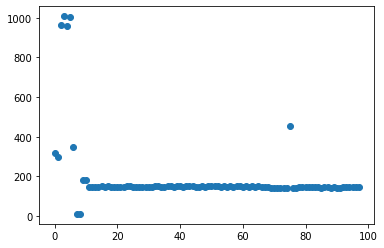

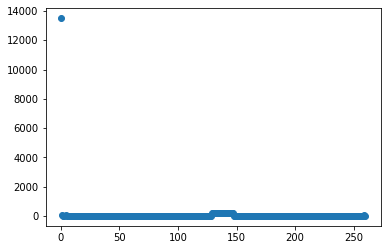

In [53]:
sIP_dict = dataFrame_1.groupby('sourceIP').groups
dIP_dict = dataFrame_1.groupby('destIP').groups

distict_sIPs_keys = list(sIP_dict.keys())
distict_dIPs_keys = list(dIP_dict.keys())

distict_sIPs_values = list(map(lambda x: x.size, sIP_dict.values()))
distict_dIPs_values = list(map(lambda x: x.size, dIP_dict.values()))

sIPs_df = pd.DataFrame(list(zip(distict_sIPs_keys, distict_sIPs_values)), 
               columns =['SourceIPs', 'Frequency']) 

dIPs_df = pd.DataFrame(list(zip(distict_dIPs_keys, distict_dIPs_values)), 
             columns =['DestinationIPs', 'Frequency']) 

sIPs_df['IndexColumn'] = sIPs_df.index
dIPs_df['IndexColumn'] = dIPs_df.index
'''print(dIPs_df.iloc[:, 1:3])'''
'''print(dIPs_df[['IndexColumn', 'Frequency']])'''

plt.scatter(sIPs_df['IndexColumn'], sIPs_df['Frequency'])
plt.show()

plt.scatter(dIPs_df['IndexColumn'], dIPs_df['Frequency'])
plt.show()

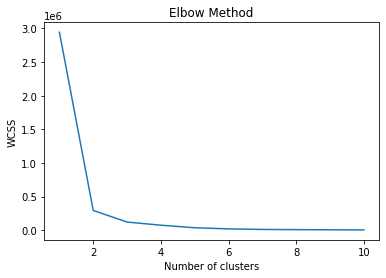

In [52]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sIPs_df[['IndexColumn', 'Frequency']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

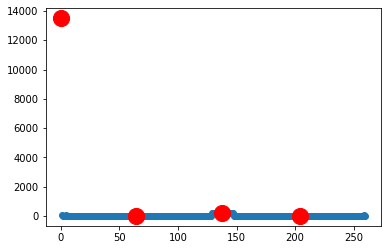

In [59]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(dIPs_df[['IndexColumn', 'Frequency']])
plt.scatter(dIPs_df['IndexColumn'], dIPs_df['Frequency'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=dIPs_df.shape[0], c='red')
plt.show()

In [60]:
print(sIPs_df)

       SourceIPs  Frequency  IndexColumn
0     10.32.5.51        319            0
1     10.32.5.52        299            1
2     10.32.5.53        966            2
3     10.32.5.54       1008            3
4     10.32.5.55        959            4
..           ...        ...          ...
93  172.23.5.115        146           93
94  172.23.5.117        148           94
95  172.23.5.120        146           95
96  172.23.5.121        146           96
97  172.23.5.124        146           97

[98 rows x 3 columns]


In [67]:
def clusterSourceIPs (row):
    if row['Frequency'] <21:
        cluster = 2
    elif row['Frequency'] >20 and row['Frequency'] <201:
        cluster = 2
    elif row['Frequency'] >200 and row['Frequency'] <401:
        cluster = 3
    else:
        cluster = 4
    return cluster

def clusterDestinationIPs (row):
    if row['Frequency'] <41:
        cluster = 1
    elif row['Frequency'] >40 and row['Frequency'] <101:
        cluster = 2
    elif row['Frequency'] >100 and row['Frequency'] <401:
        cluster = 3
    else:
        cluster = 4
    return cluster

sIPs_df['ClusterLabel'] = sIPs_df.apply(clusterSourceIPs, axis=1)
dIPs_df['ClusterLabel'] = dIPs_df.apply(clusterDestinationIPs, axis=1)

print(sIPs_df)



       SourceIPs  Frequency  IndexColumn  ClusterLabel
0     10.32.5.51        319            0             3
1     10.32.5.52        299            1             3
2     10.32.5.53        966            2             4
3     10.32.5.54       1008            3             4
4     10.32.5.55        959            4             4
..           ...        ...          ...           ...
93  172.23.5.115        146           93             2
94  172.23.5.117        148           94             2
95  172.23.5.120        146           95             2
96  172.23.5.121        146           96             2
97  172.23.5.124        146           97             2

[98 rows x 4 columns]


In [119]:


def createLabelForSource(row):
    ip = row['sourceIP']
    indexVal = sIPs_df[sIPs_df.SourceIPs == ip].index.item();
    '''print(indexVal)'''
    '''print(ip.head())'''
    '''print(sIPs_df.at[indexVal,'ClusterLabel'])'''
    return sIPs_df.at[indexVal,'ClusterLabel']

def createLabelForDestination(row):
    ip = row['destIP']
    indexVal = dIPs_df[dIPs_df.DestinationIPs == ip].index.item();
    '''print(indexVal)'''
    '''print(ip.head())'''
    '''print(sIPs_df.at[indexVal,'ClusterLabel'])'''
    return dIPs_df.at[indexVal,'ClusterLabel']

newDF = dataFrame_1[['sourceIP', 'destIP', 'classification']]
'''ddf = newDF[:3]'''

'''newDF.drop(['NewLabel'])'''
newDF['SourceLabel'] = newDF.apply(createLabelForSource, axis=1)
newDF['DestinationLabel'] = newDF.apply(createLabelForDestination, axis=1)
print(newDF)



<ipython-input-119-e194ef29b9f9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['SourceLabel'] = newDF.apply(createLabelForSource, axis=1)


         sourceIP          destIP  classification  SourceLabel  \
0      10.32.5.58  172.23.232.154   Misc activity            2   
1      10.32.5.56   172.23.232.56   Misc activity            4   
2      10.32.5.54    172.23.232.1   Misc activity            4   
3      10.32.5.57   172.23.233.52   Misc activity            3   
4      10.32.5.54   172.23.233.56   Misc activity            4   
...           ...             ...             ...          ...   
18425  10.32.5.51  172.23.134.216   Misc activity            3   
18426  10.32.5.55  172.23.134.215   Misc activity            4   
18427  10.32.5.53  172.23.134.219   Misc activity            4   
18428  10.32.5.56   172.23.134.78   Misc activity            4   
18429  10.32.5.54  172.23.128.118   Misc activity            4   

       DestinationLabel  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
18425                 3  

<ipython-input-119-e194ef29b9f9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['DestinationLabel'] = newDF.apply(createLabelForDestination, axis=1)
